In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.time import Time 
from astropy.stats import sigma_clip
from scipy.stats import norm
from scipy.special import erfc
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html


## Plot 1 : Generate static $F_{true}$ distribution, consider an Euclidean count $N_{obs}$ of  $F_{obs}$  drawn from an underlying Gaussian $p(F_{obs})$ 

In [2]:
dir_save = '/astro/users/suberlak/S13Agg_analysis/data_products/'

e scale the distribution of F_true values by sigma, thus considering x_true = F_true  / sigma . 

The observed points corresponding to each F_true are drawn from a Gaussian distribution   ($p(F) \sim \mathcal{N}(F_{true}, \sigma)$), centered on F_true, with a width sigma.   For a scaled x_true,  the distribution is centered on x_true, with a width of 1.

If the number of possible sources was constant with decreasing flux (increasing magnitudes), then the plot of x_true vs x_obs, assuming we draw a 100 observations at the same time of each x_true , so that there are 100 values of x_obs for each x_true  would be : 


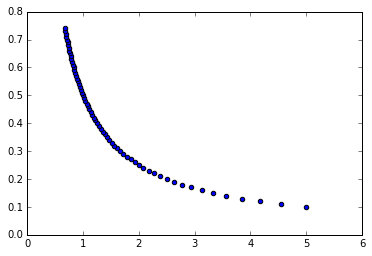

In [39]:
# Generate f_true 
fmin = 0
fmax = 1
n_points_f_true = 1000

f_true = np.linspace(fmin, fmax, n_points_f_true)

sigma_arr = []
median_arr = []
percentile = []
for i in range(10,75):
    percentile.append(i)
    sigma = np.percentile(f_true,i)
    sigma_arr.append(sigma)
    median_arr.append(np.median(f_true / sigma )) 
plt.scatter(median_arr,sigma_arr)

In [41]:
percentile[median_arr==2]

10

In [44]:
# Thus, choose sigma to be the tenth percentile, so that the median(flux/sigma) == 2  : 

sigma = np.percentile(f_true,10)
np.median(f_true/sigma)

5.0


However, the total number of sources increases with decreasing flux (increasing magnitudes), according to Euclidean cumulative distribution function:

$N(>F) \propto F ^{-1.5}$  , or $N(<m) \propto 10^ {0.6 m }$

this means that our distribution of possible flux as we go to fainter objects (lower S/N) becomes wider , as there is more x_obs points per each x_true towards the faint end : 

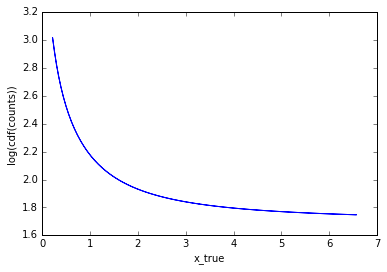

In [11]:

# Choose points with S/N > 0.2 ... 
n0 = 100
mask_close_zero = x_true>0.2
n = n0 * x_true[mask_close_zero] **(-1.5)+50
plt.plot(x_true[mask_close_zero], np.log10(n))
plt.xlabel('x_true')
plt.ylabel('log(cdf(counts))')

Make a plot that shows how for each x_true we draw  x_obs points ,  where number of points comes from an Euclidean cdf, which describes  N(x > x_true).  Thus I need to recover the pdf from the cdf to get N(x = x_true):

In [303]:
sorted_x

array([  0.2020202 ,   0.3030303 ,   0.4040404 ,   0.50505051,
         0.60606061,   0.70707071,   0.80808081,   0.90909091,
         1.01010101,   1.11111111,   1.21212121,   1.31313131,
         1.41414141,   1.51515152,   1.61616162,   1.71717172,
         1.81818182,   1.91919192,   2.02020202,   2.12121212,
         2.22222222,   2.32323232,   2.42424242,   2.52525253,
         2.62626263,   2.72727273,   2.82828283,   2.92929293,
         3.03030303,   3.13131313,   3.23232323,   3.33333333,
         3.43434343,   3.53535354,   3.63636364,   3.73737374,
         3.83838384,   3.93939394,   4.04040404,   4.14141414,
         4.24242424,   4.34343434,   4.44444444,   4.54545455,
         4.64646465,   4.74747475,   4.84848485,   4.94949495,
         5.05050505,   5.15151515,   5.25252525,   5.35353535,
         5.45454545,   5.55555556,   5.65656566,   5.75757576,
         5.85858586,   5.95959596,   6.06060606,   6.16161616,
         6.26262626,   6.36363636,   6.46464646,   6.56

In [310]:
np.log10(n_counts_cdf)

array([ 1.0419078 ,  0.77777091,  0.5903628 ,  0.44499779,  0.32622592,
        0.22580573,  0.13881781,  0.06208903, -0.00654721, -0.06863624,
       -0.12531908, -0.17746224, -0.22573926, -0.2706841 , -0.31272718,
       -0.35222059, -0.38945597, -0.42467761, -0.4580922 , -0.48987615,
       -0.52018123, -0.54913896, -0.57686407, -0.60345722, -0.62900723,
       -0.65359285, -0.67728426, -0.7001442 , -0.72222909, -0.74358975,
       -0.76427218, -0.78431812, -0.80376558, -0.82264927, -0.84100096,
       -0.85884979, -0.8762226 , -0.89314412, -0.9096372 , -0.92572299,
       -0.94142114, -0.95674989, -0.97172622, -0.98636598, -1.00068396,
       -1.014694  , -1.02840906, -1.04184133, -1.05500221, -1.06790247,
       -1.08055222, -1.09296101, -1.10513785, -1.11709124, -1.12882925,
       -1.14035949, -1.1516892 , -1.16282523, -1.17377408, -1.18454196,
       -1.19513474, -1.20555803, -1.21581717, -1.22591724, -1.23586311,
       -1.24565941, -1.25531058, -1.26482084, -1.27419427, -1.28

In [323]:
from scipy.stats import rv_discrete
x = np.linspace(1,100)
cdf = rv_discrete.cdf(x)

TypeError: unbound method cdf() must be called with rv_discrete instance as first argument (got ndarray instance instead)

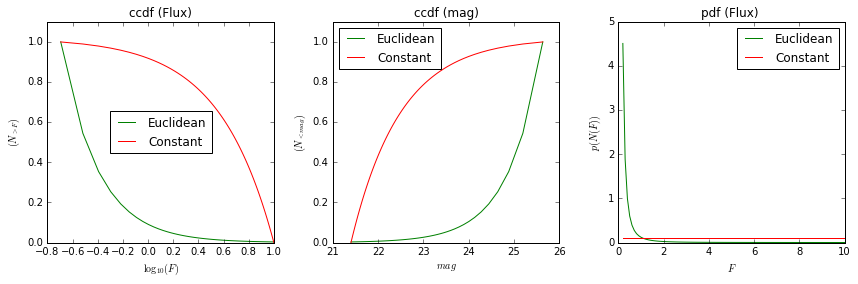

In [145]:
%matplotlib inline
# compare Euclidean and constant counts...
fig,ax = plt.subplots(1,3, figsize=(12,4))

# Flux 
fmin = 0
fmax = 1
n_points_f_true = 100

f_true = np.linspace(fmin, fmax, n_points_f_true)
sigma = np.percentile(f_true,10)
x_true = f_true / sigma 

# grab only points that are far enough from 0 
# that the number of counts does not become exponentially large... 
mask_close_zero = x_true>0.2
sorted_x = np.sort(x_true[mask_close_zero])

F = sorted_x
delF = F[1]-F[0]

# left
ax[0].set_xlabel(r'$\log_{10}(F)$')
ax[0].set_ylabel(r'$(N_{>F})$')
ax[0].set_title('ccdf (Flux)')
ax[0].set_ylim(0,1.1)
#ax[0].set_xlim(-0.8,1.1)

# middle 
ax[1].set_xlabel(r'$mag$')
ax[1].set_ylabel(r'$(N_{<mag})$')
ax[1].set_title('ccdf (mag)')
ax[1].set_ylim(0,1.1)

# right 
ax[2].set_xlabel(r'$F$')
ax[2].set_ylabel(r'$p(N(F))$')
ax[2].set_title('pdf (Flux) ')

# Euclidean distribution of N vs Flux 
n0 = 50 
euc_ccdf_count = n0*F **(-1.5)
euc_ccdf_norm  = euc_ccdf_count / euc_ccdf_count[0]
calib = 1e-29
mag = -2.5*np.log10(F*calib)-48.6

euc_pdf_norm = np.zeros_like(euc_ccdf_norm)

for i in range(len(sorted_x)-1):
    rise = euc_ccdf_norm[i] - euc_ccdf_norm[i+1]
    run  = abs(F[i+1] - F[i])
    euc_pdf_norm[i] = rise / run 

# plot  log(flux) vs  log(p(N_cdf) 
ax[0].plot(np.log10(F), euc_ccdf_norm , color='green', label='Euclidean')

# plot   mag   vs log(N_cdf) 
ax[1].plot(mag, euc_ccdf_norm, color='green', label='Euclidean')

# plot N_pdf vs flux 
ax[2].plot(F, euc_pdf_norm, color='green', label='Euclidean')


# Constant distribution of N vs flux 
const_pdf = 0.5*n0*np.ones_like(F)
norm = np.sum(delF*const_pdf)
const_pdf_norm = const_pdf / norm 

const_ccdf_norm = np.zeros_like(const_pdf)
for i in range(len(const_pdf_norm)):
    const_ccdf_norm[i]= np.sum(const_pdf_norm[i+1:])

const_ccdf_norm = const_ccdf_norm / const_ccdf_norm[0]

#   plot  log(flux) vs  log(N_cdf) 
ax[0].plot(np.log10(F), const_ccdf_norm, color='red', label='Constant')

# plot   mag   vs log(N_cdf) 
ax[1].plot(mag, const_ccdf_norm, color='red', label='Constant')

# plot N_pdf vs flux 
ax[2].plot(F,const_pdf_norm, color='red', label='Constant')

ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[2].legend()

plt.tight_layout()

#plt.scatter(np.log10(sorted_x), np.log10(n_counts_cdf))

#plt.scatter(mag, np.log10(n_counts_cdf))

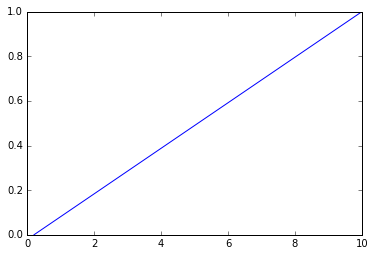

In [152]:
plt.plot(F, 1-const_ccdf_norm)

In [383]:
# The same calculation, showing exactly what I am doing :
# for  Euclidean  , cdf is given (how many counts up to a certain Flux, going from above : N (>F), 
# NOT the traditional cdf, where we think about up to a certain Flux from below)
# This is because it is derived as a number of objects up to a certain distance : N(<d),  
# which translates to  N(>F) or  N(<m)   
#(brighter than a certain flux or  equialently, with a magnitude 
# smaller than  a certain magnitude )

euc_cdf = n0*F **(-1.5)

# pdf from cdf 
euc_pdf = np.zeros_like(euc_cdf)
for i in range(len(F)-1):
    rise = euc_cdf[i] - euc_cdf[i+1]
    run  = abs(F[i+1] - F[i])
    euc_pdf[i] = rise / run 


const_pdf = n0*np.ones_like(F)

# cdf from pdf 
const_cdf = np.zeros_like(const_pdf)
for i in range(len(const_pdf)):
    const_cdf[i]= np.sum(const_pdf[i:])



In [495]:
scale = 100
# Euclidean distribution of N vs Flux 
euc_ccdf_count = n0*F **(-1.5)
euc_ccdf_norm  = euc_ccdf_count / euc_ccdf_count[0]

euc_pdf_count = np.zeros_like(euc_ccdf_norm)

for i in range(len(sorted_x)-1):
    rise = euc_ccdf_count[i] - euc_ccdf_count[i+1]
    run  = abs(F[i+1] - F[i])
    euc_pdf_count[i] = rise / run 

euc_pdf_norm = euc_pdf_count / np.sum(delF*euc_pdf_count)

euc_pdf_count = scale * euc_pdf_norm

# Constant distribution of N vs flux 
const_pdf_count = 0.5*n0*np.ones_like(F)
norm = np.sum(delF*const_pdf_count)
const_pdf_norm = const_pdf_count / norm 

const_pdf_count = scale * const_pdf_norm

const_ccdf_norm = np.zeros_like(const_pdf)
for i in range(len(const_pdf_norm)):
    const_ccdf_norm[i]= np.sum(const_pdf_norm[i+1:])

const_ccdf_norm = const_ccdf_norm / const_ccdf_norm[0]
const_ccdf_count = const_ccdf_norm * euc_ccdf_count[0]

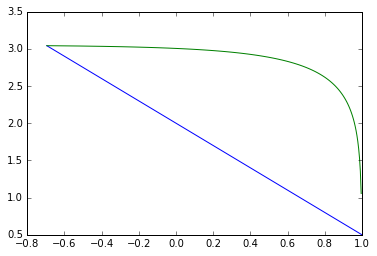

In [499]:
fig,ax = plt.subplots()
ax.plot(np.log10(F), np.log10(euc_ccdf_count))
ax.plot(np.log10(F), np.log10(const_ccdf_count))

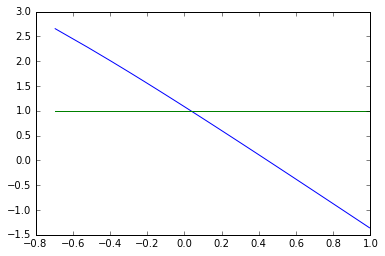

In [501]:
fig,ax = plt.subplots()
ax.plot(np.log10(F), np.log10(euc_pdf_count))
ax.plot(np.log10(F), np.log10(const_pdf_count))

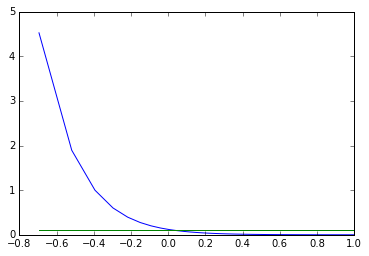

In [504]:
fig,ax = plt.subplots()
ax.plot(np.log10(F), euc_pdf_norm)
ax.plot(np.log10(F), const_pdf_norm)

In [123]:
plt.plot?

In [ ]:
ax[1].plot

5.0


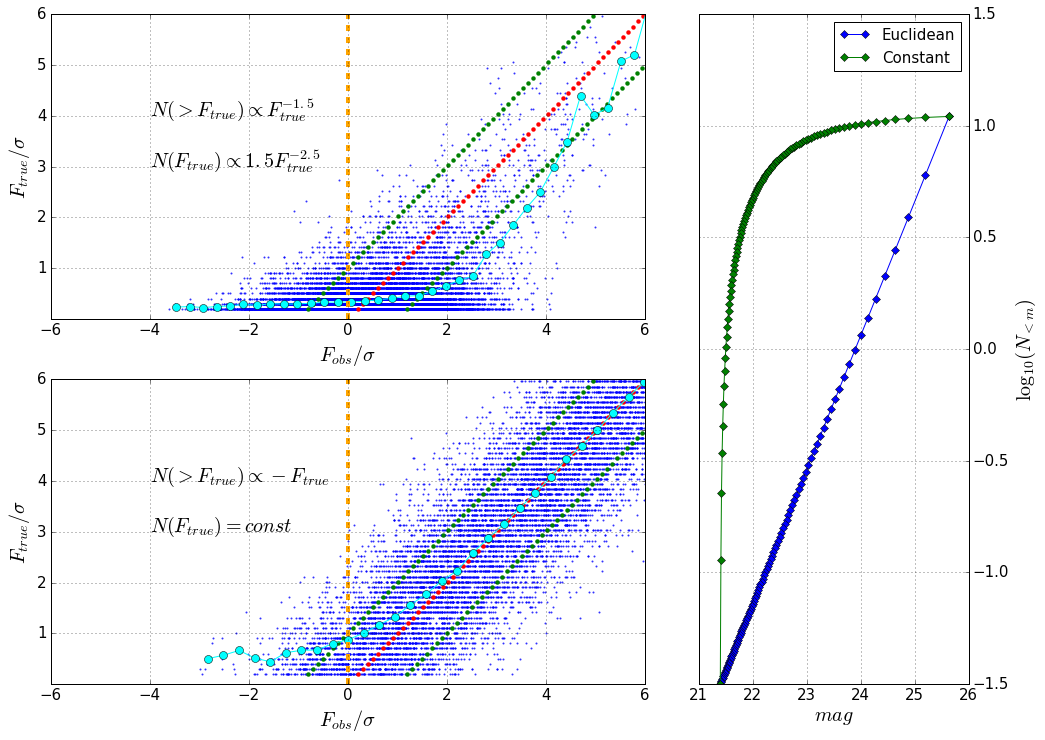

In [160]:
# define canvas object using gridspec 
%matplotlib inline

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(17,12))
gs = gridspec.GridSpec(2, 3)
ax = dict()
ax[0] = plt.subplot(gs[0, :2])
ax[1] = plt.subplot(gs[1, :2])
ax[2] = plt.subplot(gs[:2, 2])
for i in range(len(ax)):
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    
ax[0].set_ylabel(r'$F_{true} / \sigma$', fontsize=20)
ax[0].set_xlabel(r'$F_{obs} / \sigma$', fontsize=20)
ax[1].set_ylabel(r'$F_{true} / \sigma$', fontsize=20)
ax[1].set_xlabel(r'$F_{obs} / \sigma$', fontsize=20)
ax[2].set_ylabel(r'$\log_{10}(N_{<m})$', fontsize=20)
ax[2].set_xlabel(r'$mag$', fontsize=20)
gs.update(left=0.15,hspace=0.2,wspace=0.2)

# Plotting mean F_true : 
marker_size = 8 
marker_color = 'cyan'
marker_type = 'o'

# Generate f_true 
fmin = 0
fmax = 1
n_points_f_true = 100

f_true = np.linspace(fmin, fmax, n_points_f_true)
sigma = np.percentile(f_true,10)

x_true = f_true / sigma 
print np.median(x_true)
# grab only points that are far enough from 0 
# that the number of counts does not become exponentially large... 
mask_close_zero = x_true>0.2

sorted_x = np.sort(x_true[mask_close_zero])

##    DEFINE   EUCLIDEAN AND  CONSTANT  DISTRIBUTIONS  


scale = 2000
# Euclidean distribution of N vs Flux 
euc_ccdf_count = F **(-1.5)
euc_ccdf_norm  = euc_ccdf_count / euc_ccdf_count[0]

euc_pdf_count = np.zeros_like(euc_ccdf_norm)

for i in range(len(sorted_x)-1):
    rise = euc_ccdf_count[i] - euc_ccdf_count[i+1]
    run  = abs(F[i+1] - F[i])
    euc_pdf_count[i] = rise / run 

euc_pdf_norm = euc_pdf_count / np.sum(delF*euc_pdf_count)
euc_pdf_count = scale * euc_pdf_norm

# Constant distribution of N vs flux 
const_pdf_count = 0.5*np.ones_like(F)
norm = np.sum(delF*const_pdf_count)
const_pdf_norm = const_pdf_count / norm 

const_pdf_count = scale * const_pdf_norm

const_ccdf_norm = np.zeros_like(const_pdf)
for i in range(len(const_pdf_norm)):
    const_ccdf_norm[i]= np.sum(const_pdf_norm[i+1:])

const_ccdf_norm = const_ccdf_norm / const_ccdf_norm[0]
const_ccdf_count = const_ccdf_norm * euc_ccdf_count[0]


## PLOT EUCLIDEAN DISTRIBUTION 

n_counts = euc_pdf_count

# For each of those points, generate a Gaussian distribution of points, with a width of sigma
x_obs = []  # store 1000 arrays of N(F) Gaussian draws each 

for i in range(len(sorted_x)):
    # draw a 100 points from a Gaussian centered on x_true, width of sigma (=1 since scaled by sigma )
    n_draw = n_counts[i].astype(int)
    x_obs_i = np.random.normal(loc=sorted_x[i], scale = 1, size = n_draw)
    x_obs.append(x_obs_i)


x_obs_flatten = np.zeros(0)
x_true_flatten = np.zeros(0)
for i in range(len(sorted_x)):
    x_obs_i = x_obs[i]  # an array of N_draw values  drawn from a Gaussian, 
                        # n_draw Euclidean, Gaussian centered on x_true 
    x_true_i = sorted_x[i]  #  a single value corresponding to the true measurement 
    #if (x_true_i < 3.2) & (x_true_i > 3 ) : 
    x_true_arr =  np.ones_like(x_obs_i) * x_true_i
    ax[0].scatter(x_obs_i, x_true_arr, lw=0, s=4, alpha=0.8 )
    # mark the mean , the mean of underlying gaussian, i.e. x_true
    ax[0].scatter(x_true_i, x_true_i, color='red', lw=0)
    # mark the +/-  1 sigma level, where we expect 68% of points to be 
    ax[0].scatter(x_true_i-1, x_true_i, color='green', lw=0)
    ax[0].scatter(x_true_i+1, x_true_i, color='green', lw=0)
    
    # flatten x_obs and x_true,  by storing a N_obs array, where for each x_obs there is an x_true:
    x_obs_flatten =  np.append(x_obs_flatten,x_obs_i)
    x_true_flatten = np.append(x_true_flatten, x_true_arr)

# OVERPLOT MEAN X_TRUE BINNED ALONG X_OBS 

from scipy.stats import binned_statistic
stats = binned_statistic(x=x_obs_flatten, values=x_true_flatten, statistic='mean', bins=50)
statistic, bin_edges, bin_number = stats[0], stats[1], stats[2]
bin_center = (bin_edges[:-1] + bin_edges[1:])/2
ax[0].plot(bin_center, statistic,  marker = marker_type, color=marker_color, markersize=marker_size)


## PLOT CONSTANT  DISTRIBUTION 

n_counts = const_pdf_count

# For each of those points, generate a Gaussian distribution of points, with a width of sigma
x_obs = []  # store 1000 arrays of N(F) Gaussian draws each 

for i in range(len(sorted_x)):
    # draw a 100 points from a Gaussian centered on x_true, width of sigma (=1 since scaled by sigma )
    n_draw = n_counts[i].astype(int)
    x_obs_i = np.random.normal(loc=sorted_x[i], scale = 1, size = n_draw)
    x_obs.append(x_obs_i)


x_obs_flatten = np.zeros(0)
x_true_flatten = np.zeros(0)
for i in range(len(sorted_x)):
    x_obs_i = x_obs[i]  # an array of N_draw values  drawn from a Gaussian, 
                        # n_draw Euclidean, Gaussian centered on x_true 
    x_true_i = sorted_x[i]  #  a single value corresponding to the true measurement 
    #if (x_true_i < 3.2) & (x_true_i > 3 ) : 
    x_true_arr =  np.ones_like(x_obs_i) * x_true_i
    ax[1].scatter(x_obs_i, x_true_arr, lw=0, s=4, alpha=0.8 )
    # mark the mean , the mean of underlying gaussian, i.e. x_true
    ax[1].scatter(x_true_i, x_true_i, color='red', lw=0)
    # mark the +/-  1 sigma level, where we expect 68% of points to be 
    ax[1].scatter(x_true_i-1, x_true_i, color='green', lw=0)
    ax[1].scatter(x_true_i+1, x_true_i, color='green', lw=0)
    
    # flatten x_obs and x_true,  by storing a N_obs array, where for each x_obs there is an x_true:
    x_obs_flatten =  np.append(x_obs_flatten,x_obs_i)
    x_true_flatten = np.append(x_true_flatten, x_true_arr)

# OVERPLOT MEAN X_TRUE BINNED ALONG X_OBS 

from scipy.stats import binned_statistic
stats = binned_statistic(x=x_obs_flatten, values=x_true_flatten, statistic='mean', bins=50)
statistic, bin_edges, bin_number = stats[0], stats[1], stats[2]
bin_center = (bin_edges[:-1] + bin_edges[1:])/2
ax[1].plot(bin_center, statistic, marker = marker_type, color=marker_color, markersize=marker_size)
    
    
# AXIS   LABELS ,  LIMITS ..... 
xlim = [-6,6]
ylim = [0.01, 6]

# Set the labels, limits, etc for top panel
ax[0].set_xlim(xlim[0], xlim[1])
ax[0].set_ylim(ylim[0], ylim[1])
ax[0].grid()
ax[0].axvline(x=0, color='orange', ls='--', lw=4)    
ax[0].text(-4,4, r'$N(>F_{true}) \propto F_{true}^{-1.5}$', fontsize=20)  # in data coordinates 
ax[0].text(-4,3, r'$N(F_{true})  \propto 1.5 F_{true}^{-2.5}$', fontsize=20)  # in data coordinates 
    
# Set the labels, limits, etc for bottom panel
ax[1].set_xlim(xlim[0], xlim[1])
ax[1].set_ylim(ylim[0], ylim[1])
ax[1].grid()
ax[1].axvline(x=0, color='orange', ls='--', lw=4)
ax[1].text(-4,4, r'$N(>F_{true}) \propto -F_{true}$', fontsize=20) 
ax[1].text(-4,3, r'$N(F_{true}) = const$', fontsize=20) 


# Plot the cumulative number of points as log(N (m<m_true)) vs mag  to 
# show the power law behavior 
# convert flux_true  to mag_true using arbitrary zero-point... 
zero_point = 48.6
f_scale = 1e-28
#mask_x_true_lims = (sorted_x < ylim[1]) & (sorted_x > ylim[0])
#sorted_x_true = sorted_x[mask_x_true_lims]
mag_true = -2.5*np.log10(sorted_x * sigma * f_scale) - zero_point 
const_ccdf_count[-1] = euc_ccdf_count[-1] 
ax[2].plot(mag_true, np.log10(euc_ccdf_count), marker='D', label='Euclidean')
ax[2].plot(mag_true, np.log10(const_ccdf_count), marker='D', label='Constant')
#ax[2].set_ylim(ymax=25.7)
ax[2].grid()
ax[2].legend(loc='best', fontsize=15)

ax[2].yaxis.tick_right()
ax[2].yaxis.set_label_position("right")
#ax[2].set_ylim(ax[1].get_ylim()[::-1])
#plt.tight_layout()

#fig.subplots_adjust(wspace=0.1)
#fig.suptitle('Gaussian draws with Euclidean count for observed points', fontsize=15)
#plt.tight_layout()
plt.savefig(dir_save+'Fig1_Euclidean_const_counts.png',bbox_inches='tight')

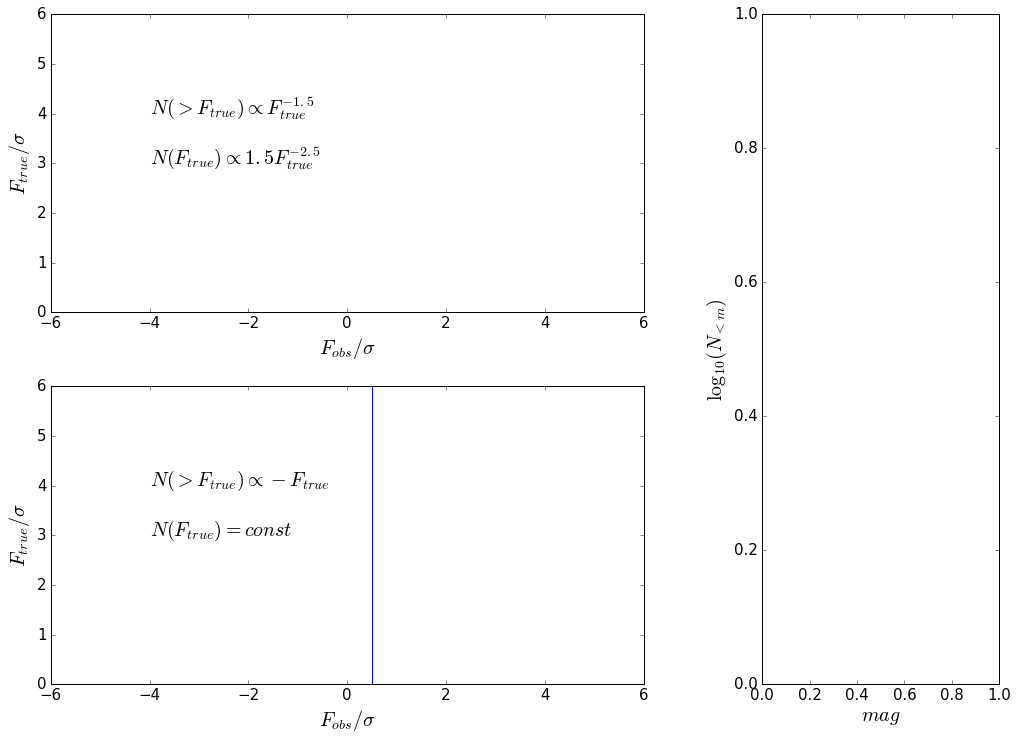

In [153]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(17,12))
gs = gridspec.GridSpec(2, 3)
ax = dict()
ax[0] = plt.subplot(gs[0, :2])
ax[1] = plt.subplot(gs[1, :2])
ax[2] = plt.subplot(gs[:2, 2])
ax[1].axvline(0.5)
for i in range(len(ax)):
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    
ax[0].set_ylabel(r'$F_{true} / \sigma$', fontsize=20)
ax[0].set_xlabel(r'$F_{obs} / \sigma$', fontsize=20)
ax[1].set_ylabel(r'$F_{true} / \sigma$', fontsize=20)
ax[1].set_xlabel(r'$F_{obs} / \sigma$', fontsize=20)
ax[2].set_ylabel(r'$\log_{10}(N_{<m})$', fontsize=20)
ax[2].set_xlabel(r'$mag$', fontsize=20)
gs.update(hspace=0.25,wspace=0.5)
xlim = [-6,6]
ylim = [0.01, 6]
ax[0].set_xlim(xlim[0], xlim[1])
ax[0].set_ylim(ylim[0], ylim[1])
ax[0].text(-4,4, r'$N(>F_{true}) \propto F_{true}^{-1.5}$', fontsize=20)  # in data coordinates 
ax[0].text(-4,3, r'$N(F_{true})  \propto 1.5 F_{true}^{-2.5}$', fontsize=20)  # in data coordinates 
ax[1].set_xlim(xlim[0], xlim[1])
ax[1].set_ylim(ylim[0], ylim[1])
ax[1].text(-4,4, r'$N(>F_{true}) \propto -F_{true}$', fontsize=20) 
ax[1].text(-4,3, r'$N(F_{true}) = const$', fontsize=20) 
#plt.tight_layout()
plt.savefig(dir_save+'test_gridspec_environ.png',bbox_inches='tight')

In [165]:
zero_point = 48.6
f_scale = 1e-28
mag_true = -2.5*np.log10(sorted_x * sigma * f_scale) - zero_point 
mag_min = -2.5*np.log10(y_min * sigma * f_scale) - zero_point 
mag_max = -2.5*np.log10(y_max * sigma * f_scale) - zero_point 

In [176]:
min(sorted_x_true)

0.20202020202020202

## Plot 2 : Illustrate p(F)  for a faint point with negative distribution tails

Calculate <F_obs> , second-moment of the likelihood, etc.... 
Essentially, it is the faint source treatment from my other work 

In [193]:
import sys
sys.path.insert(0, '/astro/users/suberlak/S13Agg_analysis/packages/')
import faintFunctions as faintF 

In [173]:
# read in results of direct integration as an interpolation table...
dir_data  = '/astro/users/suberlak/S13Agg_analysis/data_products/'
euc_prior = np.loadtxt(dir_data+ 'Fig2_xObs_xMean_xRms_euc_prior.txt')
flat_prior = np.genfromtxt(dir_data +'Fig2_xObs_xMean_xRms_flat_prior.txt')

xObs = euc_prior[:,0]

xMean_euc = euc_prior[:,1]
xRms_euc = euc_prior[:,2]

xMean_flat = flat_prior[:,1]
xRms_flat =flat_prior[:,2]


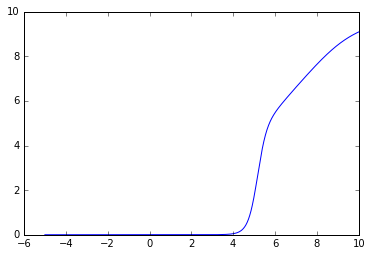

In [185]:
plt.plot(xObs,xMean_euc)
# Interpolate results :  from the tabulated results for xp = FobsSim, fp =  expF,   
# need to extrapolate expF on points  defined by x= F_faint   
# xp must be increasing - but FobsSim already is :) 

x_mean_flat = np.interp(x = x_obs_flatten, xp = xObs ,fp= xMean_flat)
x_rms_flat =  np.interp(x = x_obs_flatten, xp = xObs ,fp= xRms_flat)
x_mean_euc = np.interp(x = x_obs_flatten, xp = xObs ,fp= xMean_euc)
x_rms_euc = np.interp(x = x_obs_flatten, xp = xObs ,fp= xRms_euc)

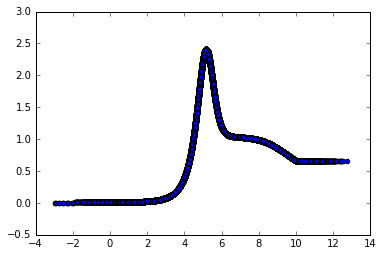

In [190]:
plt.scatter(x_obs_flatten, x_rms_euc)

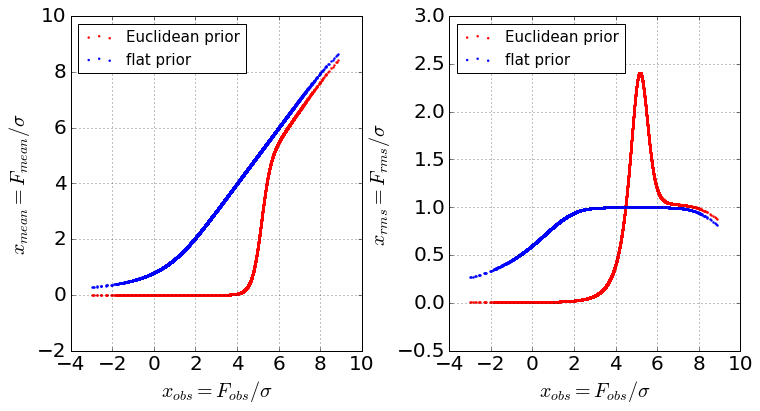

In [222]:
%matplotlib inline
fig,ax = plt.subplots(1,2, figsize=(12,6))

y_max = 6
y_min = 0
size = 6
m = (x_true_flatten < y_max) & (x_true_flatten > y_min) 
ax[0].scatter(x_obs_flatten[m], x_mean_euc[m], s=size, lw=0, color='red', label='Euclidean prior')
ax[0].scatter(x_obs_flatten[m], x_mean_flat[m], s=size, lw=0, label='flat prior')

ax[1].scatter(x_obs_flatten[m] , x_rms_euc[m], s=size, lw=0, color='red' ,label='Euclidean prior')
ax[1].scatter(x_obs_flatten[m], x_rms_flat[m], s=size, lw=0 ,label='flat prior')

ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)

ax[0].set_xlabel(r'$x_{obs} = F_{obs} / \sigma$', fontsize=20)
ax[0].set_ylabel(r'$x_{mean}= F_{mean} / \sigma$', fontsize=20)

ax[1].set_xlabel(r'$x_{obs} = F_{obs} / \sigma$', fontsize=20)
ax[1].set_ylabel(r'$x_{rms}= F_{rms} / \sigma$', fontsize=20)
fig.subplots_adjust(wspace=0.3)
ax[0].grid()
ax[1].grid()

ax[0].legend(loc='upper left', fontsize=15)
ax[1].legend(loc='upper left', fontsize=15)
plt.savefig(dir_save+'Fig3_compare_priors.png')

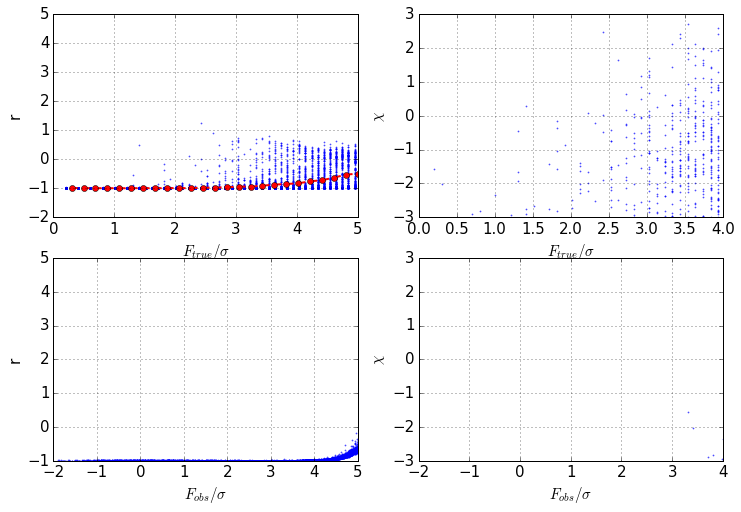

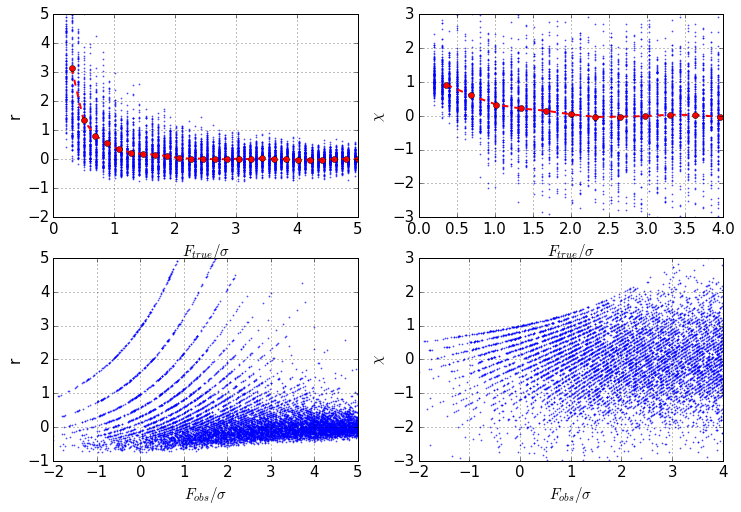

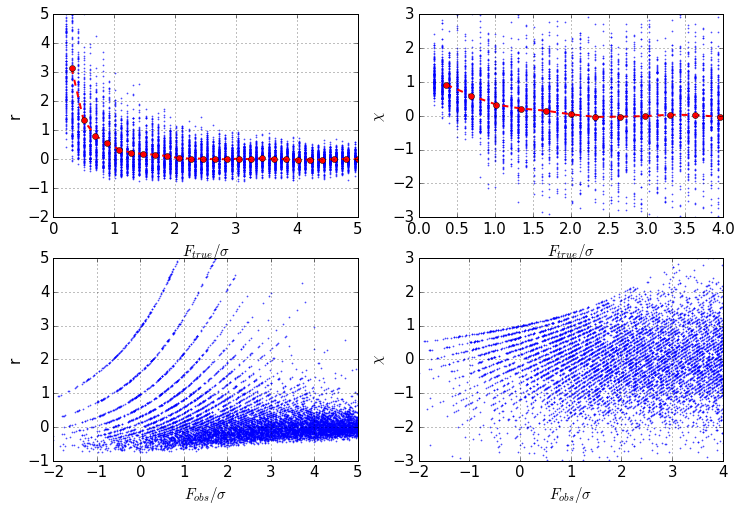

In [236]:
%matplotlib inline 

sigma_obs = np.ones_like(x_true_flatten) * sigma
f_obs_flatten = x_obs_flatten * sigma
f_obs_mean = faintF.calculate_mean(f_obs_flatten, sigma_obs)
f_obs_rms = faintF.calculate_rms(f_obs_flatten, sigma_obs)
x_mean_an = f_obs_mean / sigma 
x_rms_an = f_obs_rms / sigma 

x_mean_arr = {'flat_interp':x_mean_flat,  'euc_interp':x_mean_euc, 'flat_analytical':x_mean_an} 
x_rms_arr = {'flat_interp':x_rms_flat,  'euc_interp':x_rms_euc, 'flat_analytical':x_rms_an } 

for key in x_mean_arr.keys():
    fig,axs =  plt.subplots(2,2, figsize=(12,8))
    ax = np.ravel(axs)

    x_mean = x_mean_arr[key]
    x_rms = x_rms_arr[key]
    r = (x_mean - x_true_flatten) / x_true_flatten
    stats, bin_edges, bin_num = binned_statistic(x=x_true_flatten, values=r, statistic='mean', bins=50)
    bin_cen = (bin_edges[:-1] + bin_edges[1:])/2
    ax[0].scatter(x_true_flatten, r, lw=0, s=3, alpha=0.7)
    ax[0].set_xlabel(r'$F_{true} / \sigma$', fontsize=15)
    ax[0].set_ylabel('r', fontsize=15)
    ax[0].plot(bin_cen, stats, color='red',ls='--', marker='o', lw=2)
    ax[0].grid()
    ax[0].set_xlim(0,5)
    ax[0].set_ylim(-2,5)


    chi = (x_mean - x_true_flatten ) / x_rms
    stats, bin_edges, bin_num = binned_statistic(x=x_true_flatten, values=chi, statistic='mean', bins=30)
    bin_cen = (bin_edges[:-1] + bin_edges[1:])/2
    ax[1].scatter(x_true_flatten, chi, lw=0, s=3, alpha=0.7)
    ax[1].set_xlabel(r'$F_{true} / \sigma$', fontsize=15)
    ax[1].set_ylabel(r'$\chi$', fontsize=15)
    ax[1].plot(bin_cen, stats, color='red',ls='--', marker='o', lw=2)
    ax[1].grid()
    ax[1].set_xlim(0,4)
    ax[1].set_ylim(-3,3)

    ax[2].scatter(x_obs_flatten, r, lw=0, s=3, alpha=0.7)
    ax[2].set_xlabel(r'$F_{obs} / \sigma$', fontsize=15)
    ax[2].set_ylabel('r', fontsize=15)
    ax[2].grid()
    ax[2].set_xlim(-2,5)
    ax[2].set_ylim(-1,5)


    ax[3].scatter(x_obs_flatten, chi, lw=0, s=3, alpha=0.7)
    ax[3].set_xlabel(r'$F_{obs} / \sigma$', fontsize=15)
    ax[3].set_ylabel(r'$\chi$', fontsize=15)
    ax[3].grid()
    ax[3].set_xlim(-2,4)
    ax[3].set_ylim(-3,3)

    for axis in ax:
        axis.tick_params(axis='both', which='major', labelsize=15)

    plt.savefig(dir_save + 'Fig4_stats_prior'+key+'.png')

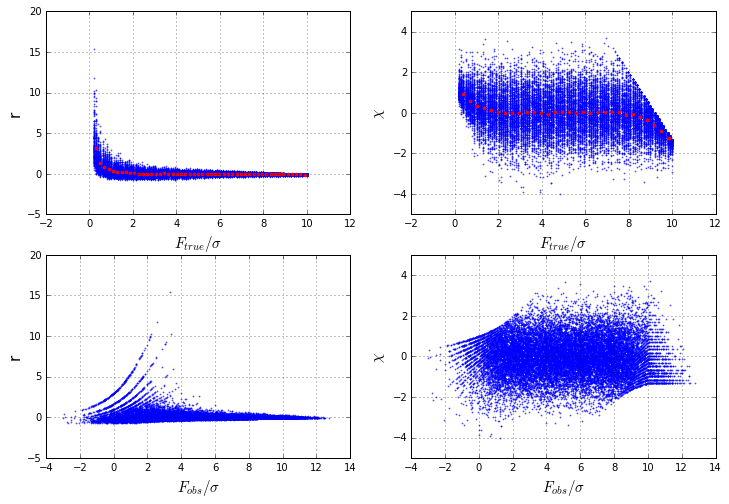

In [195]:
%matplotlib inline 
fig,axs =  plt.subplots(2,2, figsize=(12,8))
ax = np.ravel(axs)
r = (x_mean_flat - x_true_flatten) / x_true_flatten
stats, bin_edges, bin_num = binned_statistic(x=x_true_flatten, values=r, statistic='mean', bins=50)
bin_cen = (bin_edges[:-1] + bin_edges[1:])/2
ax[0].scatter(x_true_flatten, r, lw=0, s=3, alpha=0.7)
ax[0].set_xlabel(r'$F_{true} / \sigma$', fontsize=15)
ax[0].set_ylabel('r', fontsize=15)
ax[0].scatter(bin_cen, stats, color='red', s = 7)
ax[0].grid()

chi = (x_mean_flat - x_true_flatten ) / x_rms_flat
stats, bin_edges, bin_num = binned_statistic(x=x_true_flatten, values=chi, statistic='mean', bins=30)
bin_cen = (bin_edges[:-1] + bin_edges[1:])/2
ax[1].scatter(x_true_flatten, chi, lw=0, s=3, alpha=0.7)
ax[1].set_xlabel(r'$F_{true} / \sigma$', fontsize=15)
ax[1].set_ylabel(r'$\chi$', fontsize=15)
ax[1].scatter(bin_cen, stats, color='red', s = 7)
ax[1].grid()

ax[2].scatter(x_obs_flatten, r, lw=0, s=3, alpha=0.7)
ax[2].set_xlabel(r'$F_{obs} / \sigma$', fontsize=15)
ax[2].set_ylabel('r', fontsize=15)
ax[2].grid()

ax[3].scatter(x_obs_flatten, chi, lw=0, s=3, alpha=0.7)
ax[3].set_xlabel(r'$F_{obs} / \sigma$', fontsize=15)
ax[3].set_ylabel(r'$\chi$', fontsize=15)
ax[3].grid()
plt.savefig(dir_save + 'Fig4_stats_flat_prior_interpolated.png')

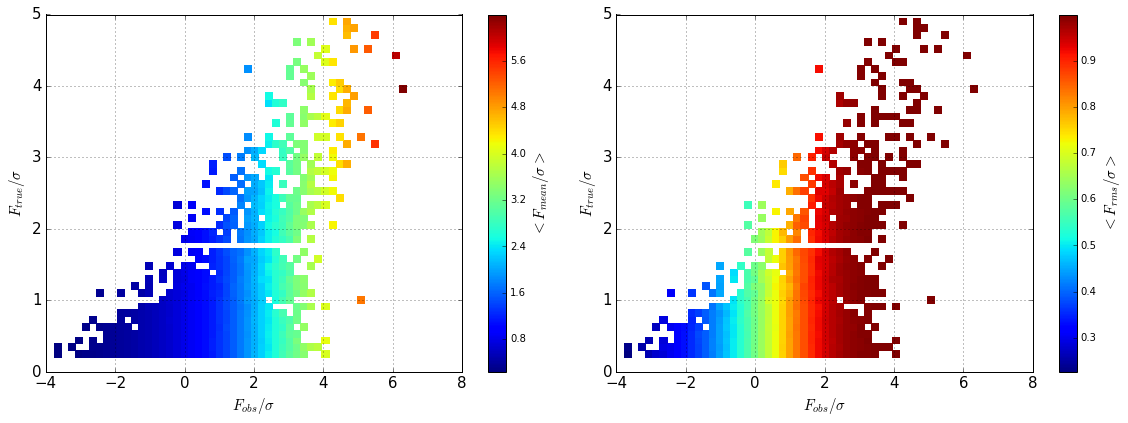

In [296]:
from scipy.stats import binned_statistic_2d

fig,ax = plt.subplots(1,2,figsize=(16,6))

# MEAN 
stats = binned_statistic_2d(y=x_true_flatten[m], x=x_obs_flatten[m], values=f_obs_mean[m] / sigma, statistic='mean', bins=50)
z_sigma, x_edges, y_edges = stats[0], stats[1], stats[2]
# replace all nan's by 0 ...
z_sigma[np.isnan(z_sigma)] =0 
z_reduce  =  z_sigma # [:-1, :-1] no need to reduce here because x_edges are already given with the right size 
z_min, z_max = z_reduce.min(), np.abs(z_reduce).max()
z_rot = np.rot90(z_reduce)  # rotate and flip to properly display... 
z_rot_flip = np.flipud(z_rot)
z_masked = np.ma.masked_where(z_rot_flip == 0 , z_rot_flip)  # mask out zeros... 

# Plot 2D histogram using pcolor
image = ax[0].pcolormesh(x_edges,y_edges,z_masked, cmap='jet')
# plt.scatter(x_true_flatten, x_obs_flatten)
colorbar = fig.colorbar(image, ax = ax[0],  orientation='vertical')
colorbar.set_label(r'$<F_{mean} / \sigma>$', fontsize=15)
ax[0].set_ylabel(r'$F_{true} / \sigma$', fontsize=15)
ax[0].set_xlabel(r'$F_{obs} / \sigma$', fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].grid()

# RMS  
stats = binned_statistic_2d(x=x_obs_flatten[m], y=x_true_flatten[m],  values=f_obs_rms[m] / sigma, statistic='mean', bins=50)
z_sigma, x_edges, y_edges = stats[0], stats[1], stats[2]
# replace all nan's by 0 ...
z_sigma[np.isnan(z_sigma)] =0 
z_reduce  =  z_sigma # [:-1, :-1] no need to reduce here because x_edges are already given with the right size 
z_min, z_max = z_reduce.min(), np.abs(z_reduce).max()
z_rot = np.rot90(z_reduce)  # rotate and flip to properly display... 
z_rot_flip = np.flipud(z_rot)
z_masked = np.ma.masked_where(z_rot_flip == 0 , z_rot_flip)  # mask out zeros... 

# Plot 2D histogram using pcolor
image = ax[1].pcolormesh(x_edges,y_edges,z_masked, cmap='jet')
# plt.scatter(x_true_flatten, x_obs_flatten)
colorbar = fig.colorbar(image, ax = ax[1],  orientation='vertical')
colorbar.set_label(r'$<F_{rms} / \sigma>$', fontsize=15)
ax[1].set_ylabel(r'$F_{true} / \sigma$', fontsize=15)
ax[1].set_xlabel(r'$F_{obs} / \sigma$', fontsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[1].grid()
plt.tight_layout()
plt.savefig(dir_save+'Sim_x_true_x_obs_2D_hist_rms_mean.png')

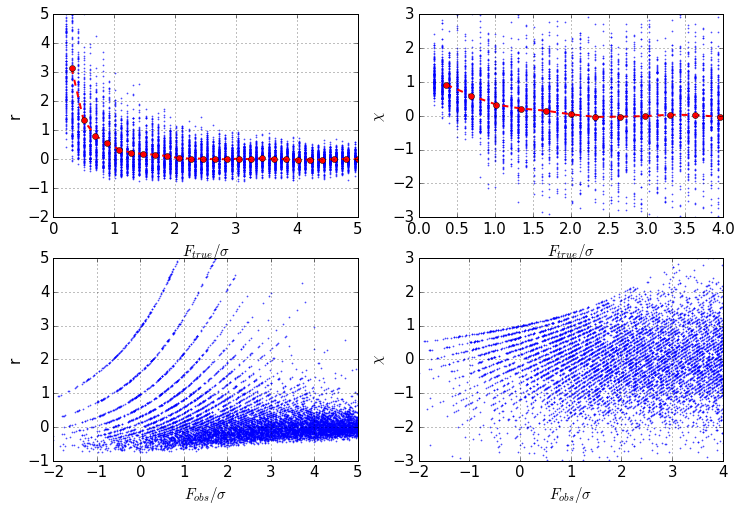

In [234]:
%matplotlib inline 
fig,axs =  plt.subplots(2,2, figsize=(12,8))
ax = np.ravel(axs)


sigma_obs = np.ones_like(x_true_flatten) * sigma
f_obs_flatten = x_obs_flatten * sigma

f_obs_mean = faintF.calculate_mean(f_obs_flatten, sigma_obs)
f_obs_rms = faintF.calculate_rms(f_obs_flatten, sigma_obs)

f_true_flatten = x_true_flatten * sigma
r = (f_obs_mean - f_true_flatten) / f_true_flatten
stats, bin_edges, bin_num = binned_statistic(x=x_true_flatten, values=r, statistic='mean', bins=50)
bin_cen = (bin_edges[:-1] + bin_edges[1:])/2
ax[0].scatter(x_true_flatten, r, lw=0, s=3, alpha=0.7)
ax[0].set_xlabel(r'$F_{true} / \sigma$', fontsize=15)
ax[0].set_ylabel('r', fontsize=15)
ax[0].plot(bin_cen, stats, color='red',ls='--', marker='o', lw=2)
ax[0].grid()
ax[0].set_xlim(0,5)
ax[0].set_ylim(-2,5)
for axis in ax:
    axis.tick_params(axis='both', which='major', labelsize=15)

chi = (f_obs_mean - f_true_flatten ) / f_obs_rms
stats, bin_edges, bin_num = binned_statistic(x=x_true_flatten, values=chi, statistic='mean', bins=30)
bin_cen = (bin_edges[:-1] + bin_edges[1:])/2
ax[1].scatter(x_true_flatten, chi, lw=0, s=3, alpha=0.7)
ax[1].set_xlabel(r'$F_{true} / \sigma$', fontsize=15)
ax[1].set_ylabel(r'$\chi$', fontsize=15)
ax[1].plot(bin_cen, stats, color='red',ls='--', marker='o', lw=2)
ax[1].grid()
ax[1].set_xlim(0,4)
ax[1].set_ylim(-3,3)

ax[2].scatter(x_obs_flatten, r, lw=0, s=3, alpha=0.7)
ax[2].set_xlabel(r'$F_{obs} / \sigma$', fontsize=15)
ax[2].set_ylabel('r', fontsize=15)
ax[2].grid()
ax[2].set_xlim(-2,5)
ax[2].set_ylim(-1,5)

ax[3].scatter(x_obs_flatten, chi, lw=0, s=3, alpha=0.7)
ax[3].set_xlabel(r'$F_{obs} / \sigma$', fontsize=15)
ax[3].set_ylabel(r'$\chi$', fontsize=15)
ax[3].grid()
ax[3].set_xlim(-2,4)
ax[3].set_ylim(-3,3)
plt.savefig(dir_save + 'Fig4_stats_flat_prior_analytical.png')

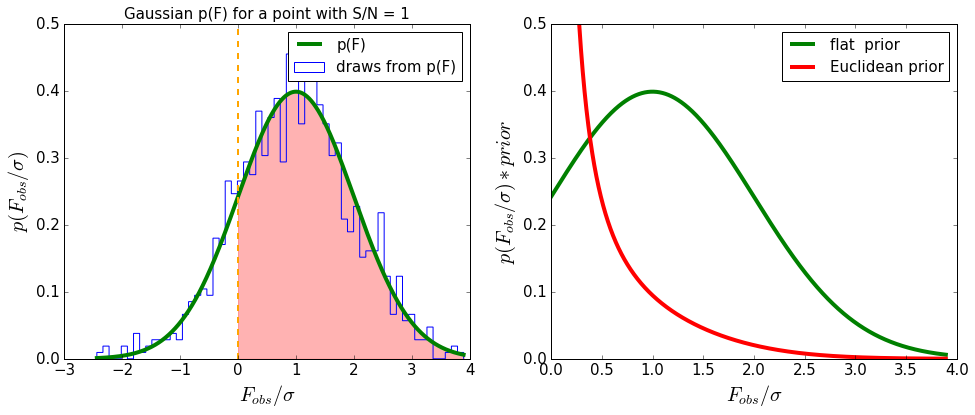

In [294]:
from scipy.stats import norm

x_true = 1
width = 1
#np.random.seed(24)
x_obs = np.random.normal(loc=x_true, scale = width, size = 1000)
fig,ax = plt.subplots(1,2, figsize=(16,6))
ax[0].hist(x_obs, normed=True, bins=60, histtype='step' , label='draws from p(F)')

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(min(x_obs), max(x_obs), 0.001)
# Mean = 0, SD = 2.
ax[0].plot(x_axis,norm.pdf(x_axis,x_true,width), lw=4 , label='p(F)')

# mark the zero
ax[0].axvline(0,lw=2,ls='--', color='orange')

# mark the posterior
# ax.plot([x1,x2], [y1,y2]) to draw a line from x1,y1 to x2,y2
#ax.plot([min(x_obs), 0], [0, 0], ls='-', color='red', lw=4)
#ax.plot([0,0], [0,norm.pdf(0,x_true,width)],ls='-', color='red', lw=4)

# shade the positive part 
mask = x_axis>0
ax[0].fill_between(x_axis[mask],norm.pdf(x_axis[mask],x_true,width), alpha=0.3, color='red' )

ax[0].set_ylim(-.01)
ax[0].set_ylabel(r'$p(F_{obs}/\sigma)$', fontsize=20)
ax[0].set_xlabel(r'$F_{obs}/\sigma$', fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=15)
# save the plot 
ax[0].set_title('Gaussian p(F) for a point with S/N = 1', fontsize=15)
ax[0].legend(fontsize=15)
ax[0].set_ylim(0,0.5)


# Plotonly the positive part 
x_pos = x_axis[x_axis>0]
y = norm.pdf(x_axis,x_true,width)
y_pos = y[x_axis>0]
ax[1].plot(x_pos,y_pos, lw=4 , color='g', label='flat  prior')

# use Euclidean posterior :  p(F) ~ F**(-1.5)
delx = x_pos[1] - x_pos[0]
normalize = np.sum(delx *x_pos**(-1.5))
euclid_norm  = x_pos**(-1.5)  / normalize
ax[1].plot(x_pos, 100*euclid_norm* y_pos, lw=4 , color='red', label='Euclidean prior' )
ax[1].set_ylim(0,0.5)
ax[1].legend(fontsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[1].set_ylabel(r'$p(F_{obs}/\sigma) * prior$', fontsize=20)
ax[1].set_xlabel(r'$F_{obs}/\sigma$', fontsize=20)
plt.savefig(dir_save + 'Sim_LC_illustrate_pF_mean_1_width_1.png')

(0, 1)

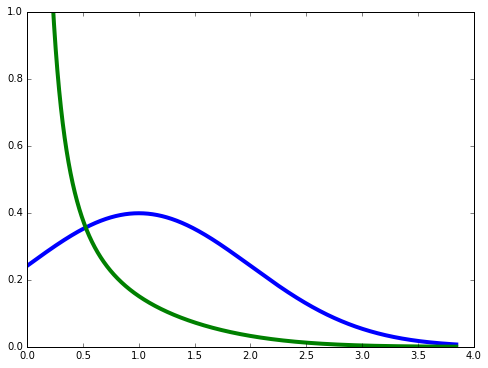

In [281]:
from scipy.stats import norm

x_true = 1
width = 1
#np.random.seed(24)
x_obs = np.random.normal(loc=x_true, scale = width, size = 1000)
fig,ax = plt.subplots(figsize=(8,6))

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(min(x_obs), max(x_obs), 0.001)
# Mean = 0, SD = 2.
y = norm.pdf(x_axis,x_true,width)
x_pos = x_axis[x_axis>0]
y_pos = y[x_axis>0]
ax.plot(x_pos,y_pos, lw=4 , label='flat  prior')


# use Euclidean posterior :  p(F) ~ F**(-1.5)
normalize = np.sum(delx *x_pos**(-1.5))

y  = x_pos**(-1.5)  / normalize
ax.plot(x_pos, 100*y* y_pos, lw=4 , label='Euclidean prior' )
ax.set_ylim(0,1)

In [244]:
delx = x_axis[1] - x_axis[0]
np.sum(delx*y)

0.99621554162454684

94.322504423817662

(0.0, 1)

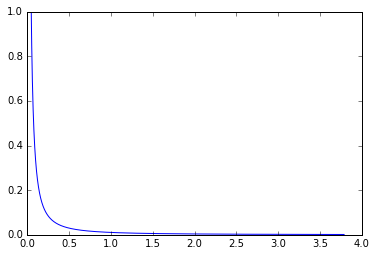

In [256]:
normalize = np.sum(delx *x_pos**(-1.5))
y  = x_pos**(-1.5)  / normalize

plt.plot(x_pos,  y)
plt.ylim(ymax=1)

In [255]:
y

array([  4.39579418e+02,   1.34900500e+02,   7.02439290e+01, ...,
         1.44041101e-03,   1.43984018e-03,   1.43926974e-03])

## Plot 3 : Illustrate the magnitude depth recovered  by faint signal treatment beyond  $2\sigma$...  

Euclidean number of counts in relation to magnitude obeys : 
    
$N(m) \propto 10^{0.6m}$

In [323]:
ax.text?

2 sigma limit mag is 23.881135
5 sigma limit mag is 22.886285


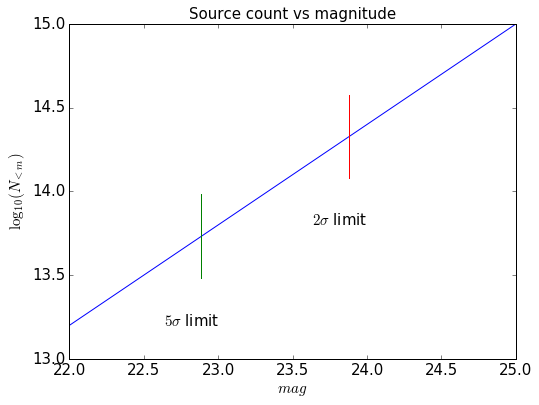

In [37]:
m = np.linspace(22,25,100)
mean_sigma = np.median(fp_data['psfFluxErr'].values) #1.2E-30
m_2sig = -2.5 * np.log10(2*mean_sigma) - 48.6
m_5sig = -2.5 * np.log10(5*mean_sigma) - 48.6
print('2 sigma limit mag is %f'%m_2sig)
print('5 sigma limit mag is %f'%m_5sig)
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(m, np.log10(10**(0.6*m)))

# plot 5 sigma limit 
linesize = 0.25
y1y2 = [ np.log10(10**(0.6*m_5sig))-linesize,np.log10(10**(0.6*m_5sig))+linesize]
x1x2 = [m_5sig, m_5sig ]
ax.plot(x1x2, y1y2)
ax.text(x=m_5sig-0.25,y=13.2,s=r'$5 \sigma$ limit', fontsize=15)

# plot 2 sigma limit 
linesize = 0.25
y1y2 = [ np.log10(10**(0.6*m_2sig))-linesize,np.log10(10**(0.6*m_2sig))+linesize]
x1x2 = [m_2sig, m_2sig ]
ax.plot(x1x2, y1y2)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.text(x=m_2sig-0.25,y=13.8,s=r'$2 \sigma$ limit', fontsize=15)
ax.set_xlabel(r'$mag$', fontsize=15)
ax.set_ylabel(r'$\log_{10}(N_{<m})$', fontsize=15)
ax.set_title('Source count vs magnitude', fontsize=15)
plt.savefig(dir_save+'Source_count_vs_magnitude.png')

I could measure the N(m) : take several thousands of the raw FP lightcurves, do the faint-point treatment, recalculate to magnitudes, and plot how many points do we have in total up to a certain magnitude (cumulative distribution)

In [32]:

DirIn = '/astro/store/scratch/tmp/suberlak/S13Agg/rawDataFPSplit/'
name = 'g00_21.csv'
fp_data = pd.read_csv(DirIn+name+'.gz', compression='gzip',  
                     usecols=['objectId', 'mjd', 'psfFlux', 'psfFluxErr'], nrows=10000)


In [33]:
import sys
sys.path.insert(0, '/astro/users/suberlak/S13Agg_analysis/packages/')
import faintFunctions as faintF 

In [34]:
####  first drop all NaNs  in psfFlux...      
m1  = np.isnan(fp_data['psfFlux'])  # True if NaN  
m2 =  ~np.isfinite(fp_data['psfFlux']) #  True if not finite  
m  = m1 | m2  # a logical or 
if np.sum(m) > 0 :  # only apply if there is anything to drop ... 
    fp_data.drop(m.index[m], inplace=True)  # drop entire rows 
    print('Okay, we dropped %d rows where psfFlux is NaN or inf'%np.sum(m))

#### check to make sure that there are no NaN or 0 psfFluxErr... 
m1  = np.isnan(fp_data['psfFluxErr'])  # True if NaN  
m2 =  ~np.isfinite(fp_data['psfFluxErr']) #  True if not finite
m3 =   fp_data['psfFluxErr'].values == 0 # True if Err == 0  (IN2P3 problem...)
m  = m1 | m2 | m3  # a logical or 
if np.sum(m) > 0 :  # only apply if there is anything to drop ... 
    fp_data.drop(m.index[m], inplace=True)
    print('Okay, we dropped %d rows where psfFluxErr is NaN or inf'%np.sum(m))

# make a new column, fill with 0's
fp_data['flagFaint'] = 0

# mask those rows that correspond to SNR < 2
mask = (fp_data['psfFlux'].values / fp_data['psfFluxErr'].values) < 2

# print info how many points are affected
print('There are %d points of %d that have SNR<2' %(np.sum(mask),len(mask)))

# set flag at those rows to 1
fp_data.ix[mask, 'flagFaint'] = 1

# make new columns for  Mean  Median  2 sigma...
fp_data['faintMean'] = np.nan
fp_data['faintMedian'] = np.nan
fp_data['faintTwoSigma'] = np.nan
fp_data['faintRMS'] = np.nan
# calculate the faint replacement only for faint points...
print('Faint points treatment...')
fp_data.ix[mask, 'faintMean'] = faintF.calculate_mean(fp_data['psfFlux'][mask].values,fp_data['psfFluxErr'][mask].values)
fp_data.ix[mask, 'faintMedian'] = faintF.calculate_median(fp_data['psfFlux'][mask].values,fp_data['psfFluxErr'][mask].values)
fp_data.ix[mask, 'faintTwoSigma'] = faintF.calculate_2sigma(fp_data['psfFlux'][mask].values,fp_data['psfFluxErr'][mask].values)
fp_data.ix[mask, 'faintRMS'] = faintF.calculate_rms(fp_data['psfFlux'][mask].values,fp_data['psfFluxErr'][mask].values)

#
##########  STEP 2 : Derived Quantities ###########  
#

####  replace all psfFlux  where SNR < 2  with  faintMean  
rows = fp_data['flagFaint'] == 1
fp_data.ix[rows, 'psfFlux'] = fp_data.ix[rows, 'faintMean']

def flux2absigma(flux, fluxsigma):
  """Compute AB mag sigma given flux and flux sigma"""
  FIVE_OVER_2LOG10 = 1.085736204758129569
  return FIVE_OVER_2LOG10 * fluxsigma / flux;


def flux2ab(flux):
  """Compute AB mag given flux"""
  return -2.5 * np.log10(flux) - 48.6;

fp_data['psfMag'] = flux2ab(fp_data['psfFlux'])
fp_data['psfMagErr'] = flux2absigma(fp_data['psfFlux'],fp_data['psfFluxErr'])

print('Calculating magnitudes from fluxes is finished')

There are 5464 points of 10000 that have SNR<2
Faint points treatment...
Calculating magnitudes from fluxes is finished


offset b=-10.406611


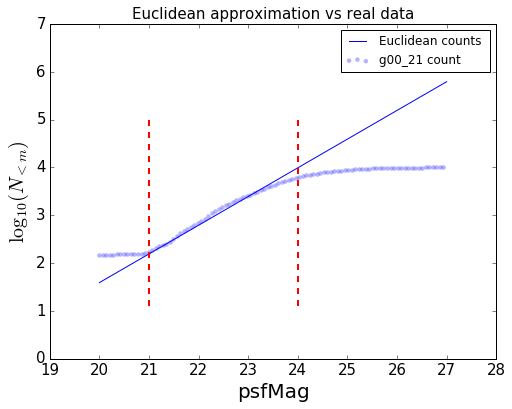

In [38]:
m = np.linspace(20,27,100)
N_cumulative = np.zeros_like(m)
N_between_m = np.zeros_like(m)
for i in range(len(m)-1):
    N_between_m[i] = np.sum((fp_data['psfMag'].values >m[i])&(fp_data['psfMag'].values <m[i+1]))
    N_cumulative[i] = np.sum(fp_data['psfMag'].values < m[i])
    

from scipy.optimize import curve_fit

def func(m, b):
    return np.log10(10**(0.6*m))+b

mask = (m>22) & (m<24)
popt, pcov = curve_fit(func, m[mask], np.log10(N_cumulative[mask]))

fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(m, np.log10(N_cumulative),  label='g00_21 count', alpha=0.3, lw=0)
ax.plot(m, func(m,popt[0]), label='Euclidean counts ')
ax.legend(loc='best', fontsize=12)
ax.set_ylabel(r'$\log_{10}(N_{<m})$', fontsize=20)
ax.set_xlabel('psfMag', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.plot([21,21],[1.1,5], color='red', ls='--', lw=2)
ax.plot([24,24],[1.1,5], color='red', ls='--', lw=2)
ax.set_title('Euclidean approximation vs real data', fontsize=15)
plt.savefig(dir_save+'Simulated_vs_obs_counts_one_patch_raw_FP.png')
print('offset b=%f'%popt[0])

The plot above shows the cdf of counts up to a given magnitude. In a window of $21<m<24$ we fitted functional form  $N = 10^{0.6m}+b$, with best fit offset   $b=-10.4$